# Exploratery Data Analysis

## let's do some fun operations with iris datasets

* Now we have to donwload the dataset from the link : https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
* After that just import imporatant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
iris=pd.read_csv('iris.csv')

In [3]:
print(iris.shape)

(150, 5)


In [4]:
print(iris.head())
print(iris.columns)
print(iris['variety'].value_counts())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')
Virginica     50
Setosa        50
Versicolor    50
Name: variety, dtype: int64


* lets visualise what kind of data we have !!!

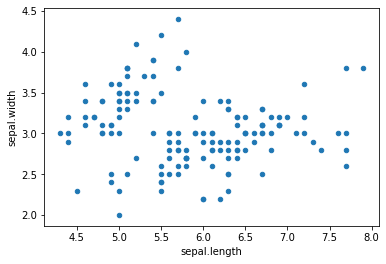

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


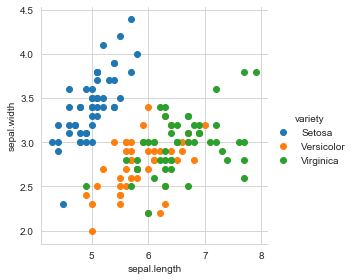

In [5]:
iris.plot(kind='scatter',x='sepal.length',y='sepal.width')
plt.show()
sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='variety',size=4).map(plt.scatter,'sepal.length','sepal.width').add_legend()
plt.show()

### Lets use pairplot.


* Pair Plots are the pairwise relationship between different attributes in some dataset. And through seaborn.pairplot() we can visualise all the possible pairs of the attributes

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


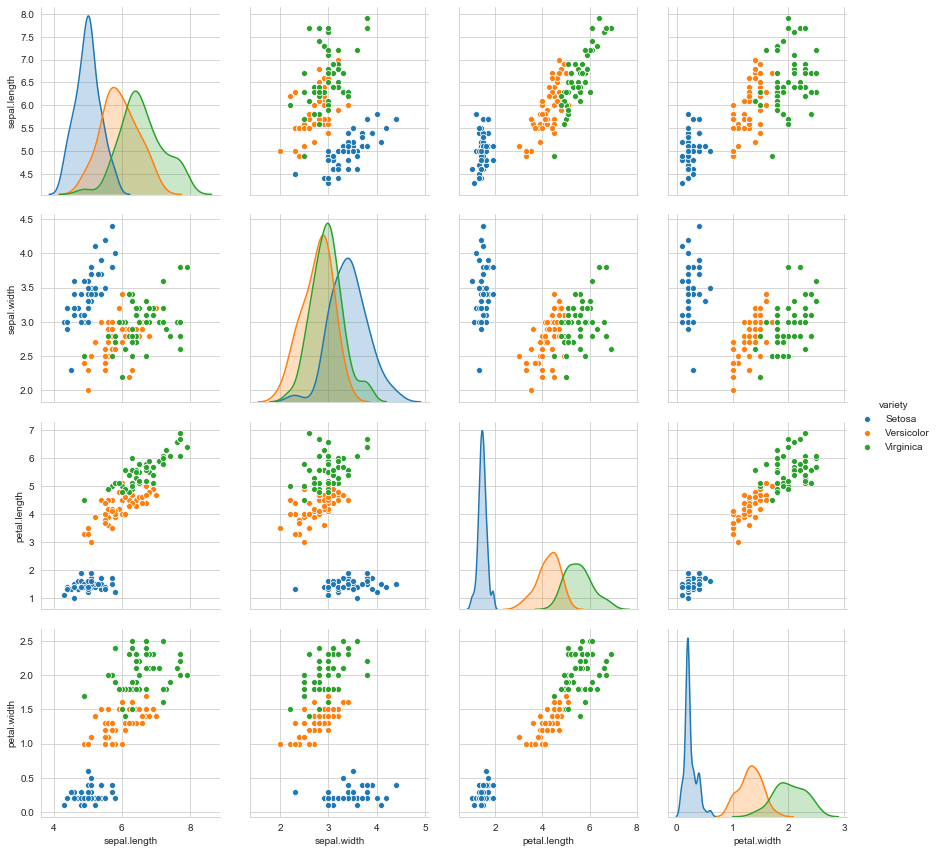

In [6]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(iris,hue='variety',size=3)
plt.show()

Since we have nothing to find out between the same attribute so we will ignore the above diagonal plots.
So we can conclude by visualising all the possible relationship between attributes of iris dataset
* petal.length and petal width are very useful to classify the various flower types
* We can also conclude that santosa is easily linearly separable and vesicolor and virginia are have some outliers but still linearly separable
* Based on these visualisation we can come up with some model to classify the iris flower types based on their attributes

## Histogram, Pdf,Cdf

What about visualising 1D? Well we can visualise in 1 Dimension by making the y values zeros or the x values zero at a time.
Lets plot histogram for different type of flower types. Y axis is simply counts of points that exists given that petal.width range
* The Continuous blue line tells the Probability density function (smooth approximation of histogram) of setosa flowers distribution

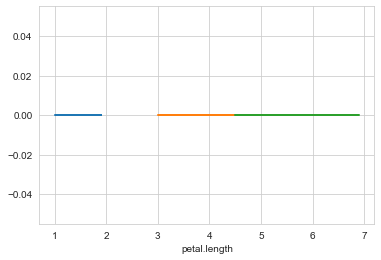

In [7]:
iris_sentosa=iris.loc[iris['variety']=='Setosa']
iris_versicolor=iris.loc[iris['variety']=='Versicolor']
iris_verginica=iris.loc[iris['variety']=='Virginica']

plt.plot(iris_sentosa['petal.length'],np.zeros_like(iris_sentosa['petal.length']));
plt.plot(iris_versicolor['petal.length'],np.zeros_like(iris_versicolor['petal.length']));
plt.plot(iris_verginica['petal.length'],np.zeros_like(iris_verginica['petal.length']));
plt.xlabel('petal.length');
plt.show()

## Univariate Analysis

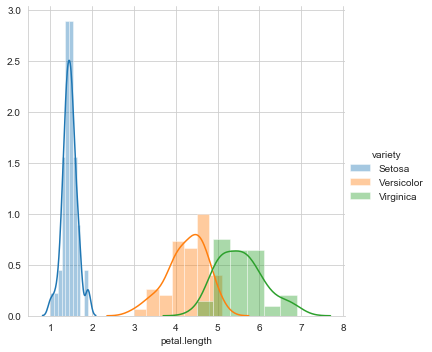

In [8]:
sns.FacetGrid(iris,hue='variety',size=5).map(sns.distplot,'petal.length').add_legend()
plt.show()

* From the above histogram plot we can conclude that petal.length less then 2 can be classifies as sentosa.
* But in case of verscolor and virginica there are some overlaping there.
* But with some approximation we can also classify.

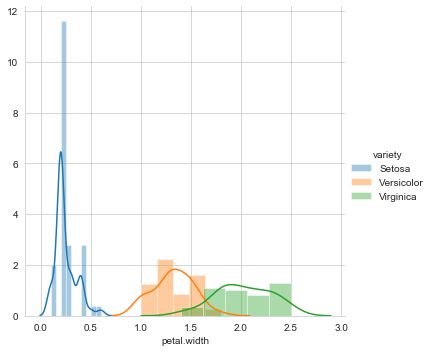

In [9]:
sns.FacetGrid(iris,hue='variety',size=5).map(sns.distplot,'petal.width').add_legend()
plt.plot();

What we are expecting to be a good classifier is the more the each of them distribution are away from each other.

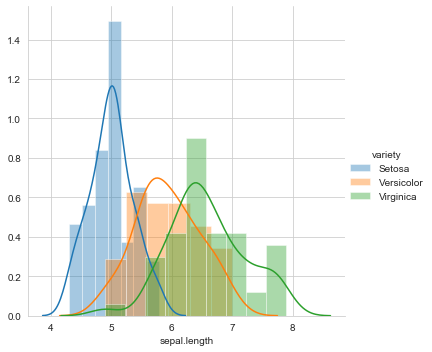

In [10]:
sns.FacetGrid(iris,hue='variety',size=5).map(sns.distplot,'sepal.length').add_legend()
plt.show();

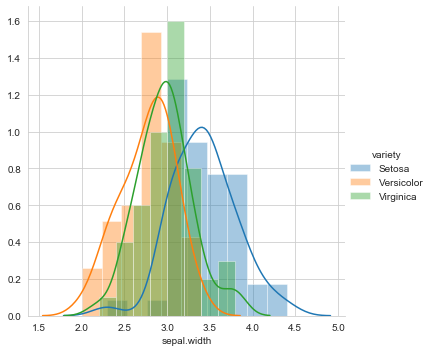

In [11]:
sns.FacetGrid(iris,hue='variety',size=5).map(sns.distplot,'sepal.width').add_legend()
plt.show()

So from all the four attribute we can conclude that petal.length attribute is slightly better then petal.width, petal.width is slightly better then sepal.length nad sepal.lenght is slightly better then sepal.width.
So The petal.length is the best attribute which countribute the best in the classification

## Cumulative Density Function

In [12]:
counts,bin_edges=(np.histogram(iris_sentosa['petal.length'],bins=10,density=True))
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)


[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


#### Computing CDF

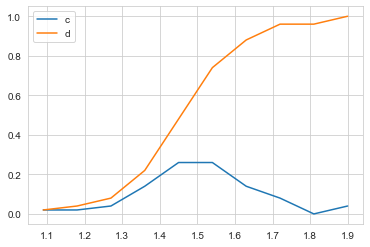

In [13]:
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.legend('pdf')
plt.plot(bin_edges[1:],cdf)
plt.legend('cdf')
plt.show()

## Mean, variance and standard deviation

In [14]:
print("Means for attribute Petal.length:")
print('For Setosa:     ',np.mean(iris_sentosa['petal.length']))
print('For Versicolor: ',np.mean(iris_versicolor['petal.length']))
print('For Verginica:  ',np.mean(iris_verginica['petal.length']))
print('\nAfter adding additional outlier of 50, Mean')
print('For Setosa now: ',np.mean(np.append(iris_sentosa['petal.length'],50)))
print("\nStdandard Deviations for attribute petal.legnth: ")
print('For Setosa:     ', np.std(iris_sentosa['petal.length']))
print('For Versicolor: ',np.std(iris_versicolor['petal.length']))
print('For Verginica:  ',np.std(iris_verginica['petal.length']))
print('\nAfter Adding additional outlier of 50 in petal.length, Variance')
print('for Setosa: ',np.std(np.append(iris_sentosa['petal.length'],50)))

Means for attribute Petal.length:
For Setosa:      1.4620000000000002
For Versicolor:  4.26
For Verginica:   5.552

After adding additional outlier of 50, Mean
For Setosa now:  2.4137254901960787

Stdandard Deviations for attribute petal.legnth: 
For Setosa:      0.17191858538273286
For Versicolor:  0.4651881339845204
For Verginica:   0.5463478745268441

After Adding additional outlier of 50 in petal.length, Variance
for Setosa:  6.731868010072429


From the above Data analysis we can conclude that both mean and variance are sensitive to outlier.

## Median, Percentile, Quantile, IQR and MAD

In [15]:
print('Median for petal.length attribute :')
print('For Setosa:     ',np.median(iris_sentosa['petal.length']))
print('For Versicolor: ',np.median(iris_versicolor['petal.length']))
print('For Verginica:  ',np.median(iris_verginica['petal.length']))
print('\nAfter addinng additional outlier of 50 in sentosa , The median: ')
print('For Setosa:     ',np.median(np.append(iris_sentosa['petal.length'],50)))

Median for petal.length attribute :
For Setosa:      1.5
For Versicolor:  4.35
For Verginica:   5.55

After addinng additional outlier of 50 in sentosa , The median: 
For Setosa:      1.5


In [16]:
print('Quantiles for petal.length attribute: ')
print('For Setosa:     ',np.percentile(iris_sentosa['petal.length'],np.arange(0,100,25)))
print('For Versicolor: ',np.percentile(iris_versicolor['petal.length'],np.arange(0,100,25)))
print('For Verginica:  ',np.percentile(iris_verginica['petal.length'],np.arange(0,100,25)))

print('\n90th Percentile for petal.length attribute is : ')
print('For Setosa:     ',np.percentile(iris_sentosa['petal.length'],90))
print('For Versicolor: ',np.percentile(iris_versicolor['petal.length'],90))
print('For Verginica:  ',np.percentile(iris_verginica['petal.length'],90))

Quantiles for petal.length attribute: 
For Setosa:      [1.    1.4   1.5   1.575]
For Versicolor:  [3.   4.   4.35 4.6 ]
For Verginica:   [4.5   5.1   5.55  5.875]

90th Percentile for petal.length attribute is : 
For Setosa:      1.7
For Versicolor:  4.8
For Verginica:   6.3100000000000005


As we have seen with median that median is not sensitive with outliers. Similierly Percentiles are not sensitve with outliers.

For Median Absolute Median we have to import statsmodels.robust library

In [19]:
#pip install statsmodels

In [20]:
from statsmodels import robust

In [21]:
print('\nMedian Absolute Deviation for petal.length attribute is : ')
print('For Setosa:     ',robust.mad(iris_sentosa['petal.length']))
print('For Versicolor: ',robust.mad(iris_versicolor['petal.length']))
print('For Verginica:  ',robust.mad(iris_verginica['petal.length']))
print('\nAfter adding outlier of 50 in Setosa, Median Absolute Deviation\nFor Setosa:     ',robust.mad(np.append(iris_sentosa['petal.length'],50)))


Median Absolute Deviation for petal.length attribute is : 
For Setosa:      0.14826022185056031
For Versicolor:  0.5189107764769602
For Verginica:   0.6671709983275211

After adding outlier of 50 in Setosa, Median Absolute Deviation
For Setosa:      0.14826022185056031


So we can conclude by above analysis that the Median Absolute Deviation is not sensitive with outliers

## Box Plots 

Box plots are used to visualise the 1 Dimensional Scater plot. With the help of boxplots we can very easily analysis the percentilt values.

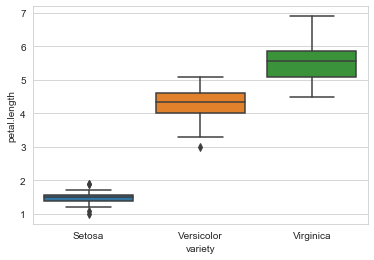

In [24]:
sns.boxplot(x='variety',y='petal.length',data=iris);
plt.show()

## Violin Plots
Violin plots can be used as the combination of both box plots and histogram. Where the spread of the biolin plot can be seen as histogram density function so that we can easily visualise the distribution as well.

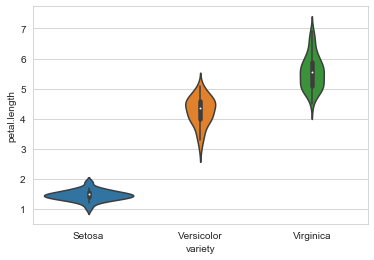

In [30]:
sns.violinplot(x='variety',y='petal.length',data=iris, size=8)
plt.show()

## Visualising the Multivariate density plots

In [32]:
# 2D Contour density plot

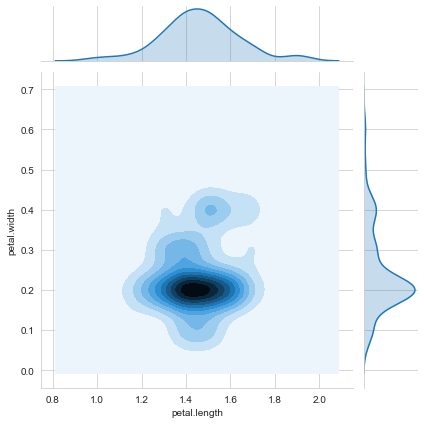

In [41]:
sns.jointplot(x='petal.length',y='petal.width',data=iris_sentosa,kind='kde')
plt.show()